## Linear Regression Modelling - Boston House Price 

In [230]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [267]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  target  
0     15.3  396.9   4.98    24.0  
1     17.8  396.9   9.14    21.6

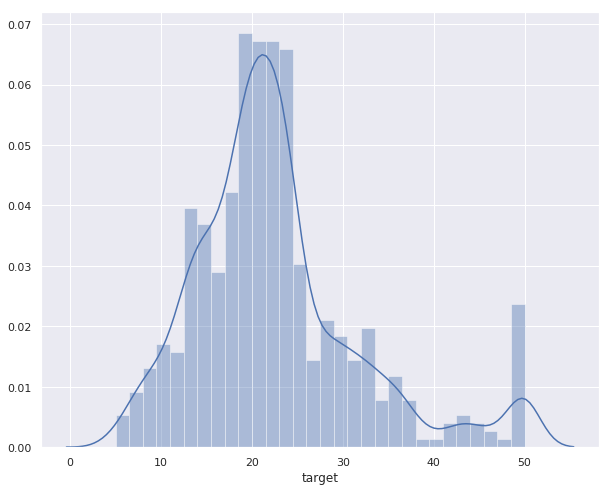

In [3]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(df['target'], bins=30)
plt.show()

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size = 0.3, random_state=42)

In [5]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation:

- R squared measures the strength of the relationship between your model and the dependent variable. Value close to 1 indicates good score, value close to 0 indicates bad score

In [6]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.748208239685937
R2 score is 0.7434997532004697


The model performance for testing set
--------------------------------------
RMSE is 4.638689926172867
R2 score is 0.7112260057484874


## Keras 

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

#### Keras Sequential Model
- 1st layer: dense layer with 32 neurons, ReLU activation and the input shape is 13 since we have 13 input features
- 2nd layer: dense layer with 32 neurons, ReLU activation.
- 3rd layer: dense layer with 1 neuron

In [265]:
model = Sequential([
    Dense(128, activation='relu', kernel_initializer='normal', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1, kernel_initializer='normal')
])
model.summary()
# model.compile(Adam(lr=0.8), 'mean_squared_error')
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=500, verbose=0)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
r2 = r2_score(Y_train, Y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
r2 = r2_score(Y_test, Y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 128)               1792      
_________________________________________________________________
dense_233 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_234 (Dense)            (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________
The model performance for training set
--------------------------------------
RMSE is 3.615210423633999
R2 score is 0.8513053189433054


The model performance for testing set
--------------------------------------
RMSE is 4.126055760628365
R2 score is 0.7715255820460628


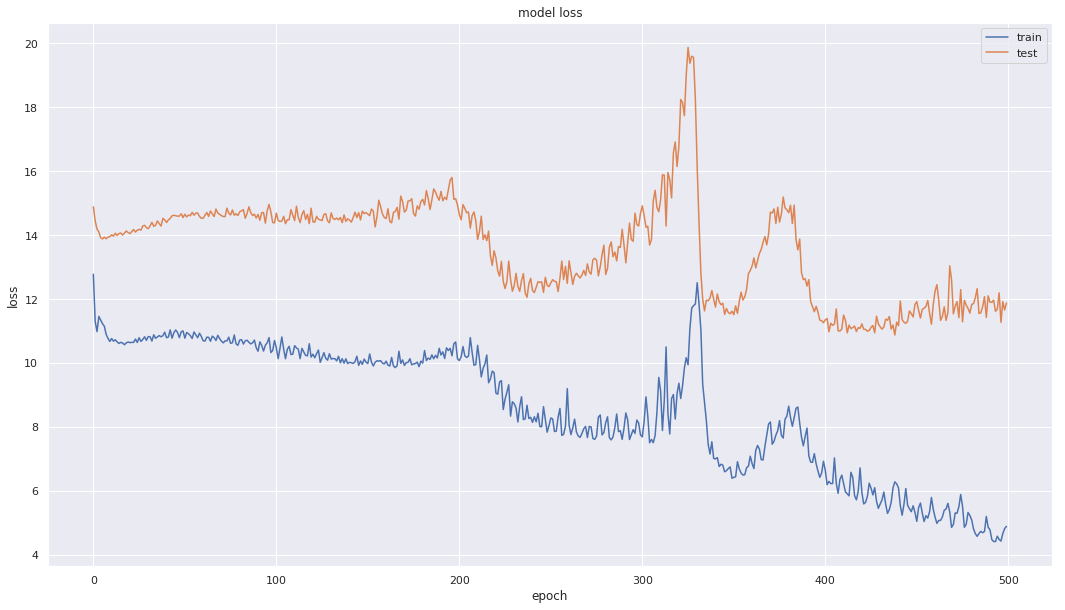

In [266]:
history = model.fit(X_train, Y_train, epochs=500, validation_data=(X_test, Y_test), shuffle=False, verbose=0)
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Logistic Regression - Wine classification

In [187]:
from sklearn.datasets import load_breast_cancer

In [190]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.shape

(569, 31)

In [191]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

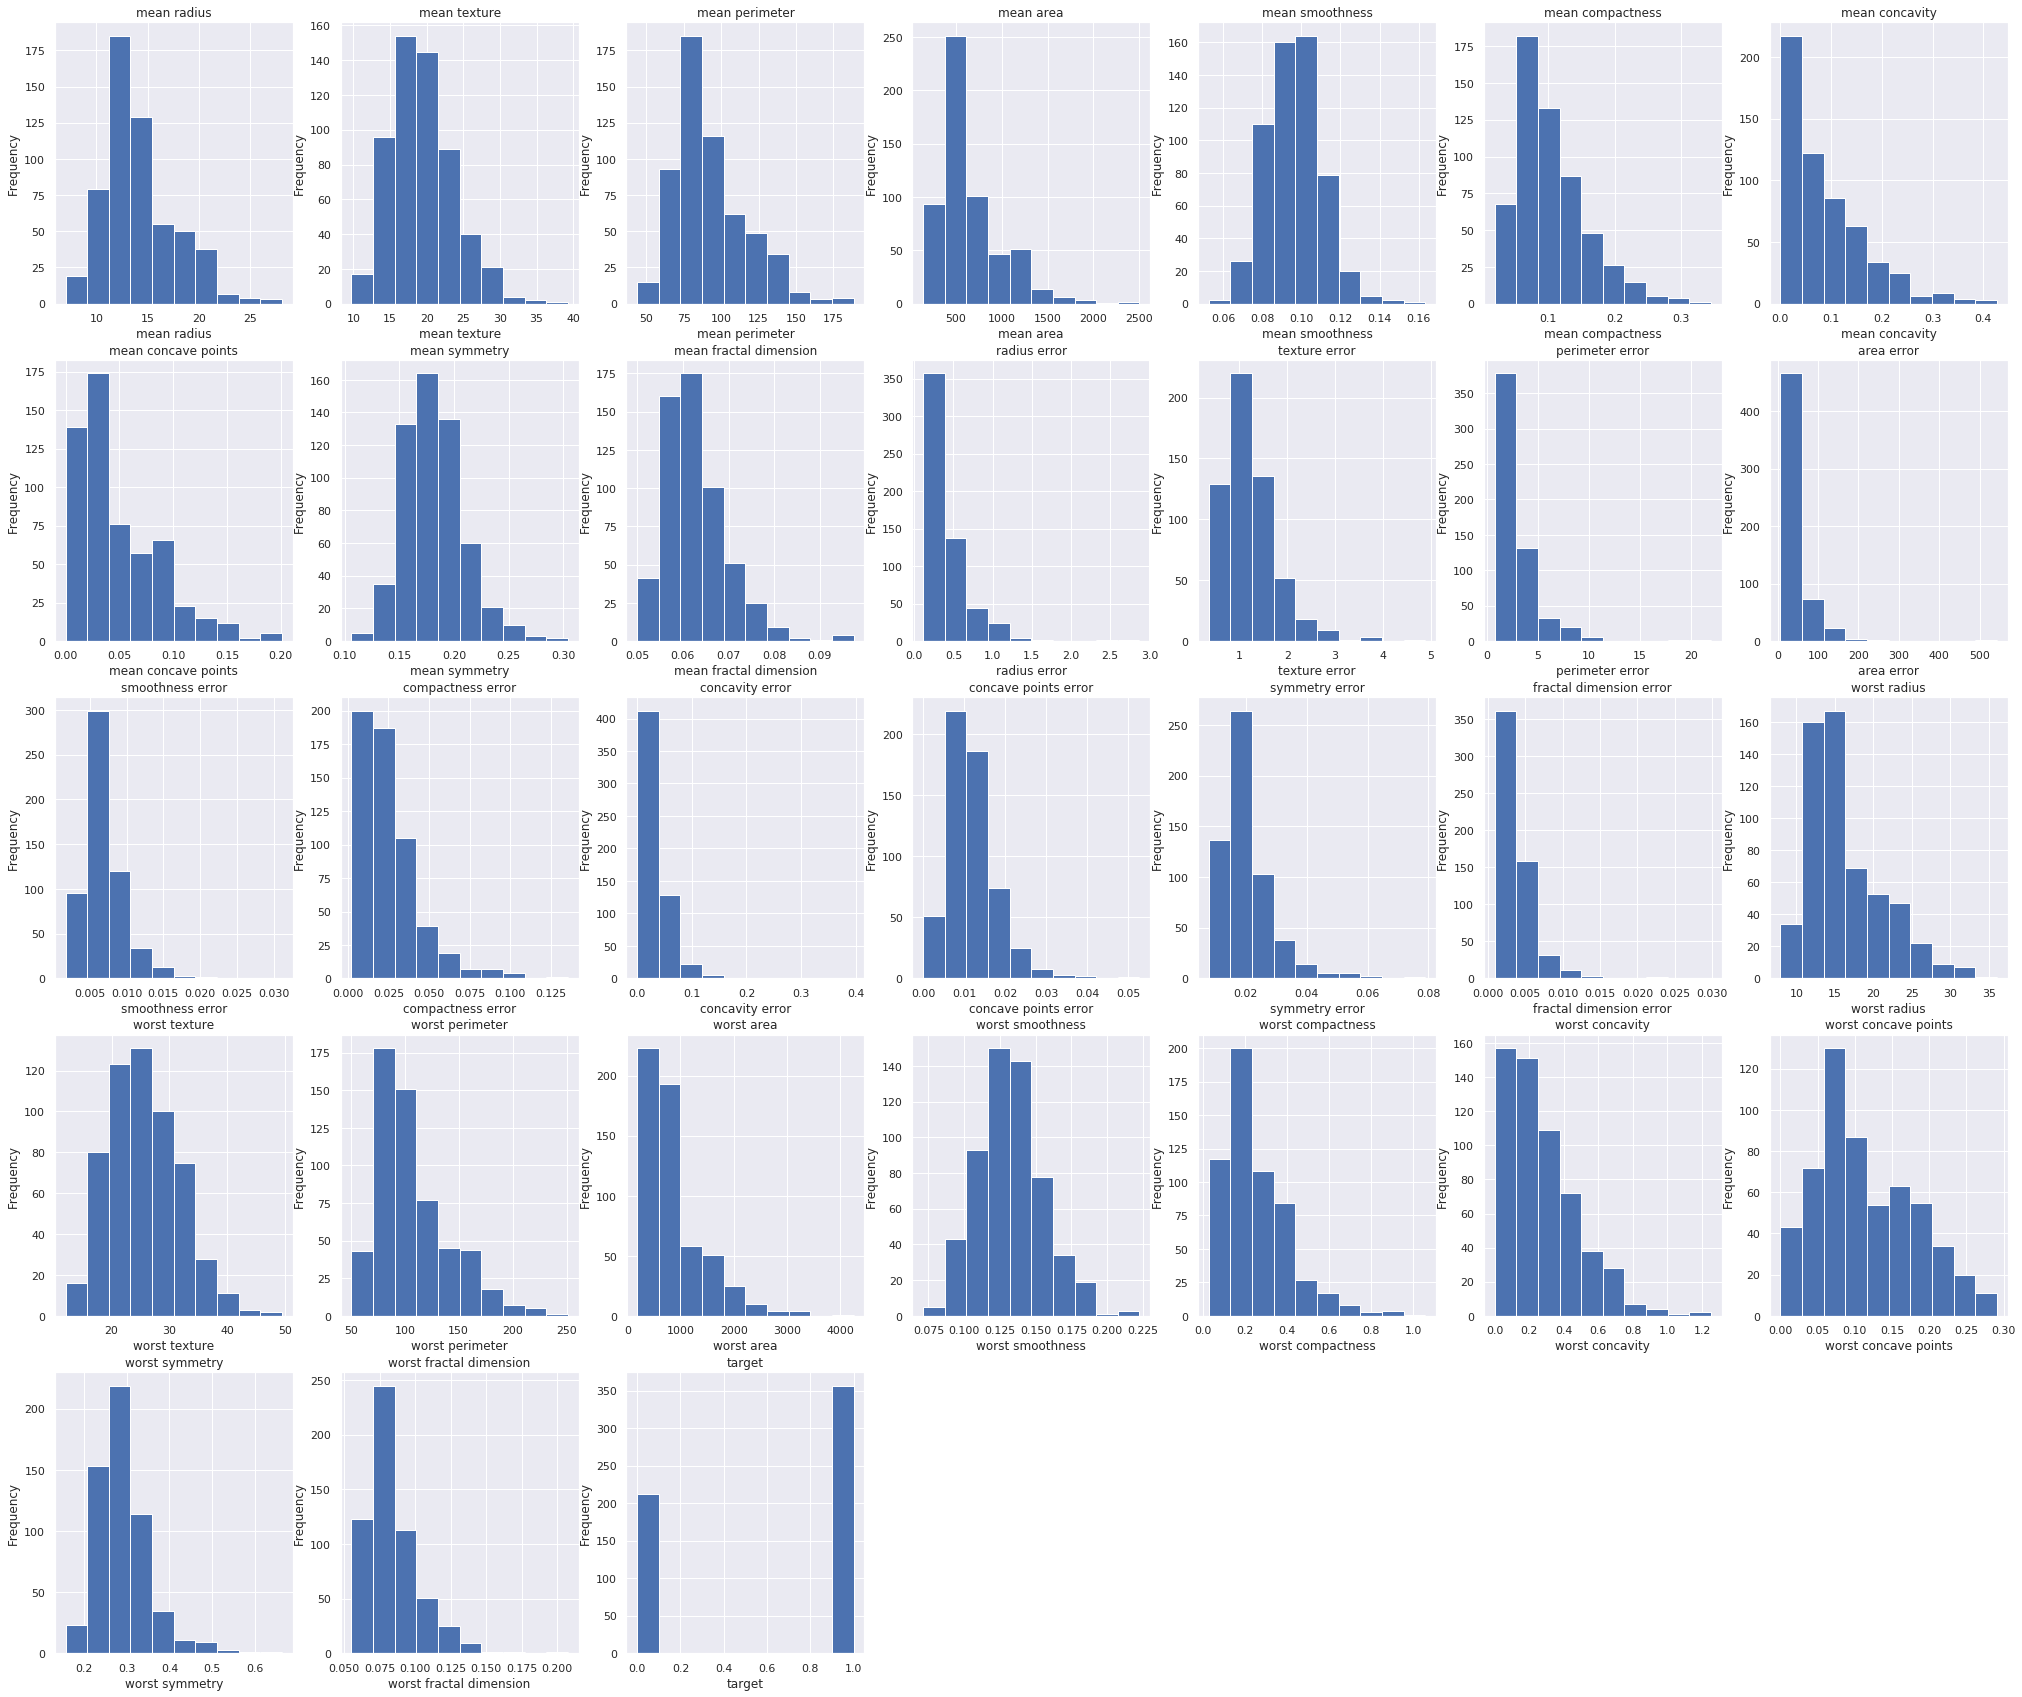

In [197]:
plt.figure(figsize=(35, 30))
cols = df.columns
columns = 7
rows = 5
for i, feature in enumerate(cols):
    plt.subplot(rows, columns, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('target', axis=1).values, df['target'].values, test_size = 0.2, random_state=42)

In [199]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation:

In [200]:
y_train_predict = lg_model.predict(X_train)
accuracy_train = (accuracy_score(Y_train, y_train_predict))

print("The model performance for training set")
print("--------------------------------------")
print('Accuracy is {}'.format(accuracy_train))
print("\n")

# model evaluation for testing set
y_test_predict = lg_model.predict(X_test)
accuracy_test = (accuracy_score(Y_test, y_test_predict))

print("The model performance for testing set")
print("--------------------------------------")
print('Accuracy is {}'.format(accuracy_test))

The model performance for training set
--------------------------------------
Accuracy is 0.9494505494505494


The model performance for testing set
--------------------------------------
Accuracy is 0.956140350877193


## Keras

In [201]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [ ]:
def build_logistic_regression_model():
    model = Sequential([
        Dense(32, activation='relu', kernel_initializer='normal', input_shape=(30,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [225]:
model = Sequential([
    Dense(32, activation='relu', kernel_initializer='normal', input_shape=(30,)),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(Adam(lr=0.007), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=500, verbose=0)

print("The train accuracy score is {:0.3f}".format(accuracy_score(Y_train, model.predict(X_train))))
print("The test accuracy score is {:0.3f}".format(accuracy_score(Y_test, model.predict(X_test))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 32)                992       
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 33        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
The train accuracy score is 0.629
The test accuracy score is 0.623


### Cross Validation

In [107]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [228]:
def build_logistic_regression_model():
    model = Sequential([
        Dense(32, activation='relu', kernel_initializer='normal', input_shape=(30,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

cv = KFold(3, shuffle=True)
scores = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))
scores

The cross validation accuracy is 0.6273 ± 0.0417


array([0.62631579, 0.67894737, 0.57671957])